数据预处理

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np


读取当前数据集的全部文件，划定故障发生时间

['1.csv', '2.csv', '3.csv', '4.csv', '5.csv', '6.csv', '7.csv', '8.csv', '9.csv', '10.csv', '11.csv', '12.csv', '13.csv', '14.csv', '15.csv', '16.csv', '17.csv', '18.csv', '19.csv', '20.csv', '21.csv', '22.csv', '23.csv', '24.csv', '25.csv', '26.csv', '27.csv', '28.csv', '29.csv', '30.csv', '31.csv', '32.csv', '33.csv', '34.csv', '35.csv', '36.csv', '37.csv', '38.csv', '39.csv', '40.csv', '41.csv', '42.csv', '43.csv', '44.csv', '45.csv', '46.csv', '47.csv', '48.csv', '49.csv', '50.csv', '51.csv', '52.csv', '53.csv', '54.csv', '55.csv', '56.csv', '57.csv', '58.csv', '59.csv', '60.csv', '61.csv', '62.csv', '63.csv', '64.csv', '65.csv', '66.csv', '67.csv', '68.csv', '69.csv', '70.csv', '71.csv', '72.csv', '73.csv', '74.csv', '75.csv', '76.csv', '77.csv', '78.csv', '79.csv', '80.csv', '81.csv', '82.csv', '83.csv', '84.csv', '85.csv', '86.csv', '87.csv', '88.csv', '89.csv', '90.csv', '91.csv', '92.csv', '93.csv', '94.csv', '95.csv', '96.csv', '97.csv', '98.csv', '99.csv', '100.csv', '101.cs

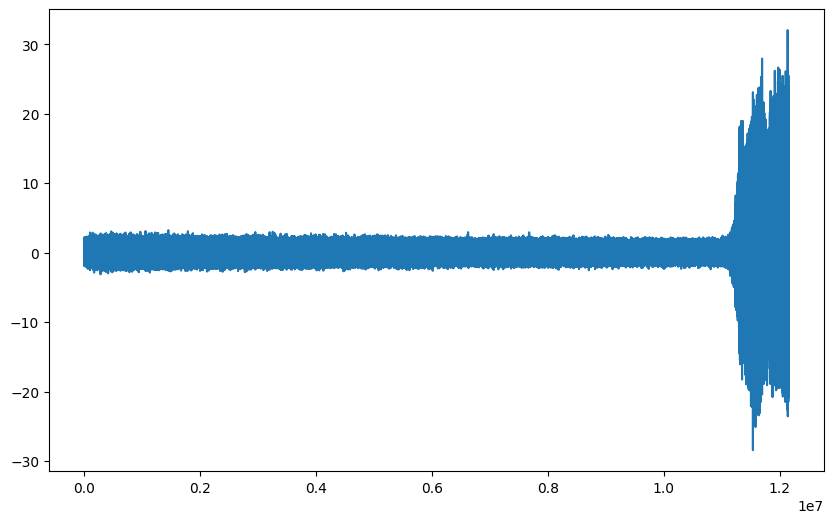

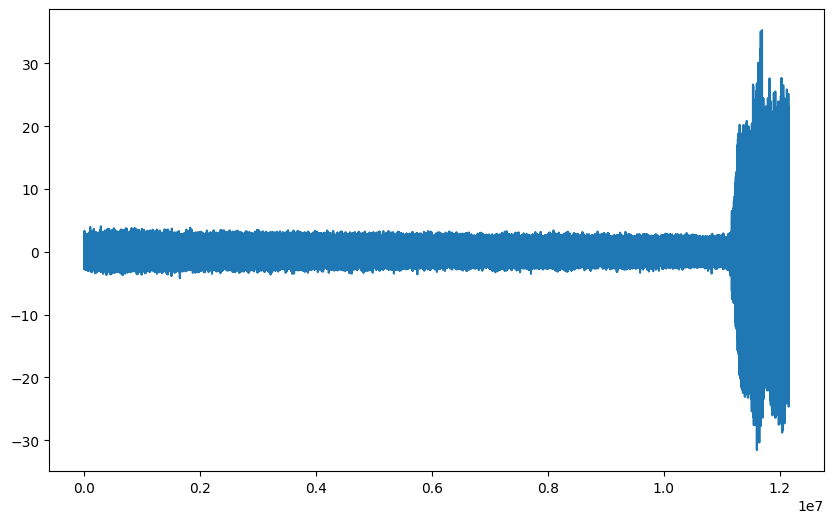

In [3]:
file_dir = 'Bearing3_3'
file_names = os.listdir(file_dir)

file_names.sort(key=lambda x: int(os.path.splitext(x)[0]))
print(file_names)

Horizontal_data = pd.DataFrame()
Vertical_data = pd.DataFrame()

for i in range(len(file_names)):
    file_path = os.path.join(file_dir, file_names[i])
    tmp_data = pd.read_csv(file_path)
    Horizontal_data = pd.concat([Horizontal_data, tmp_data.iloc[: , 0]], ignore_index=True)
    Vertical_data = pd.concat([Vertical_data, tmp_data.iloc[: , 1]], ignore_index=True)

plt.figure(figsize=(10, 6))
plt.plot(Horizontal_data)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(Vertical_data)
plt.show()


观察上面的数据，故障发生时间大致在第343组数据的位置，因此将前343组数据作为样本数据。

In [4]:
samples = []
time_labels = []

for i in range(len(file_names)):
    file_path = os.path.join(file_dir, file_names[i])
    tmp_data = pd.read_csv(file_path)

    sample = []
    sample.append(tmp_data['Horizontal_vibration_signals'].tolist())
    sample.append(tmp_data['Vertical_vibration_signals'].tolist())
    samples.append(sample)
    time_label = (i + 1) / len(file_names)
    time_labels.append(time_label)

samples = samples[:344]
time_labels = time_labels[:344]

print(len(samples))
print(len(time_labels))

np.save('signals.npy', samples)
np.save('time_labels.npy', time_labels)


344
344
